# Sentinel Minds: Detecting Depression with Machine Learning

![Mental Health Awareness](image2.cms)


## Introduction
Mental health is a critical aspect of overall well-being, yet it is often overlooked or stigmatized. With rising levels of academic and work pressure, financial stress, and other contributing factors, understanding and addressing mental health concerns, especially depression, is vital. This project aims to leverage data analysis and machine learning techniques to predict whether an individual is experiencing depression based on various factors such as age, gender, academic/work pressure, satisfaction levels, sleep patterns, and family history.


## Dataset
The dataset contains information on individuals, including demographic details, lifestyle habits, and mental health indicators:
- **Demographics**: ID, Name, Gender, Age, City
- **Academic/Professional Details**: Profession, Degree, Working Professional/Student, CGPA
- **Stress Factors**: Academic/Work Pressure, Financial Stress
- **Satisfaction Levels**: Study Satisfaction, Job Satisfaction
- **Health and Lifestyle**: Sleep Duration, Dietary Habits, Family History of Mental Illness
- **Outcome Variable**: Whether the individual has experienced depression or suicidal thoughts.

## Project Objective
The objective of this project is to analyze the dataset, clean and preprocess the data, and train machine learning models to predict if an individual is likely to have depression. This can help in early detection and intervention strategies, contributing to better mental health outcomes.


## Steps Performed
1. **Data Cleaning**: Handled missing and inconsistent data.
2. **Exploratory Data Analysis**: Identified patterns and relationships in the data.
3. **Feature Engineering**: Selected relevant features for prediction.
4. **Model Training**: Applied various machine learning models to classify individuals as experiencing depression or not.
5. **Evaluation**: Assessed model performance to determine the most effective approach.


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
# Load the data
data = pd.read_csv("train.csv")

In [142]:
# Understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [143]:
# Checking statistical summary of the data
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [144]:
# Checking for the first 5 rows of the data
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


<Axes: >

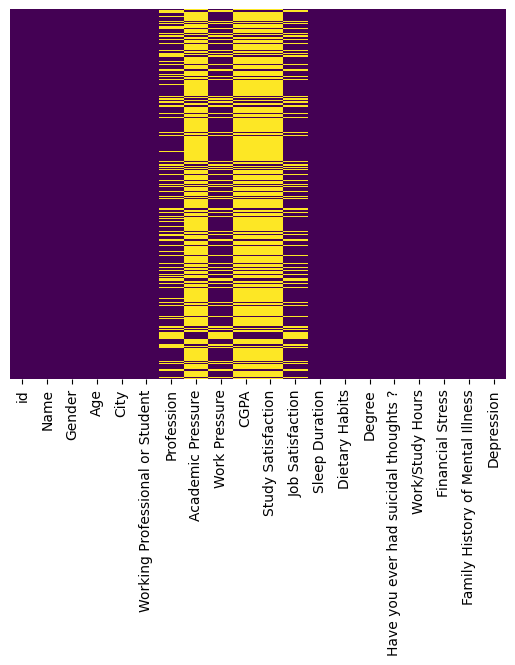

In [145]:
# Checking for null values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

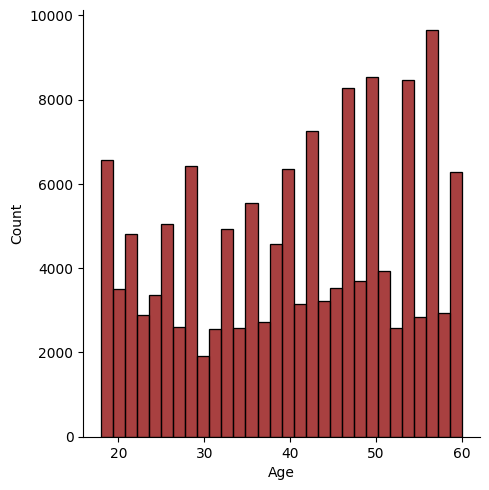

In [146]:
sns.displot(data['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: xlabel='Depression', ylabel='count'>

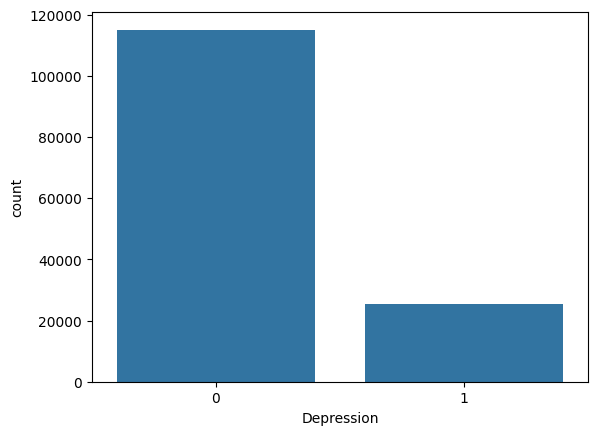

In [147]:
sns.countplot(x=data["Depression"])

<Axes: xlabel='Depression', ylabel='count'>

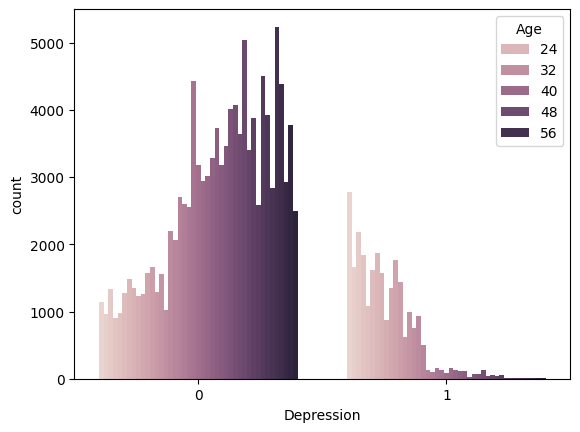

In [148]:
sns.countplot(x=data["Depression"], hue=data["Age"])

In [190]:
#Dropping id and name columns
df = data.drop(columns = ["id","Name"],axis=1)

In [191]:
# Merging Profession and Working Professional or Student
df.loc[df["Profession"].isnull() & (df["Working Professional or Student"] == "Student"), "Profession"] = "Student"

In [192]:
df["Job/ Study Satisfaction"] = df.apply(
    lambda row: row["Study Satisfaction"] if pd.isnull(row["Job Satisfaction"]) else row["Job Satisfaction"], axis=1
)

In [193]:
df["Work/ Academic Pressure"] = df.apply(
    lambda row: row["Academic Pressure"] if pd.isnull(row["Work Pressure"]) else row["Work Pressure"], axis=1
)

<Axes: xlabel='Depression', ylabel='count'>

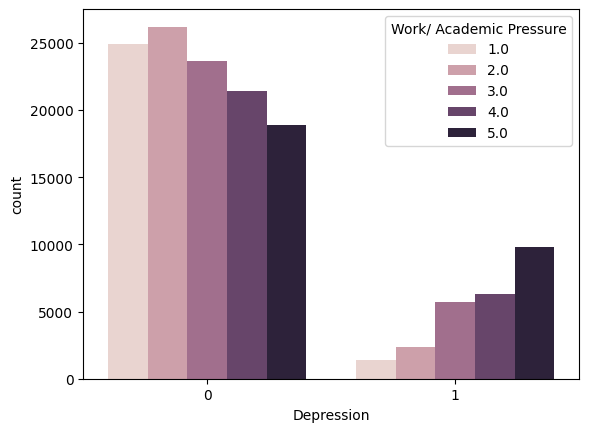

In [194]:
sns.countplot(x=df["Depression"], hue=df["Work/ Academic Pressure"])

<Axes: xlabel='Depression', ylabel='count'>

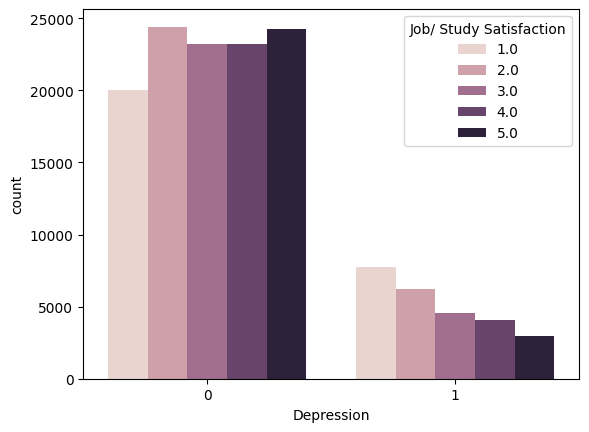

In [195]:
sns.countplot(x=df["Depression"], hue=df["Job/ Study Satisfaction"])

In [196]:
count = df[(df['CGPA'].notnull()) & (df['Depression'] == 1)].shape[0]
print(count)
count_null_cgpa = df['CGPA'].isnull().sum()
print(count_null_cgpa)
print(count/count_null_cgpa)

16336
112802
0.1448201273027074


In [197]:
null_percentage_cgpa = (data['CGPA'].isnull().sum() / len(data)) * 100
print(f"Percentage of null values in CGPA: {null_percentage_cgpa}%")

Percentage of null values in CGPA: 80.17199715707179%


~80% of CGPA column is Empty so we can drop that column

In [198]:
#Dropping CGPA and also the columns which we merged or dont need
df = df.drop(columns = ["CGPA", "Academic Pressure", "Work Pressure", "Job Satisfaction", "Study Satisfaction"],axis=1)

In [199]:
#Getting the count of each city
df["City"].value_counts()

City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

In [200]:
# Getting the unique cities
df["City"].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

In [201]:
#Keeping only the valid city names
city_names = [
    'Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur', 
    'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot', 
    'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat', 'Faridabad', 
    'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata', 'Chennai', 
    'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi', 'Bhopal', 
    'Indore', 'Morena'
]

In [202]:
# Filtering the data by removing the rows which has the some string other than city name
df["City"] = df["City"].apply(lambda x: x if x in city_names else np.nan)
df["City"].isnull().sum()

97

In [203]:
# Filling the null values with the most common city name
df["City"].fillna("Kalyan", inplace=True)

C:\Users\Deep\AppData\Local\Temp\ipykernel_22852\1340945172.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["City"].fillna("Kalyan", inplace=True)


In [204]:
# Accessing the unique values of Dietary Habits
df["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [205]:
#Keeping only three labels for dietary habits
df["Dietary Habits"] = df["Dietary Habits"].replace('Yes', 'Healthy')
df["Dietary Habits"] = df["Dietary Habits"].replace('More Healthy', 'Healthy')
df["Dietary Habits"] = df["Dietary Habits"].replace('5 Unhealthy', 'Unhealthy')
df["Dietary Habits"] = df["Dietary Habits"].replace('No', 'Moderate')
df["Dietary Habits"] = df["Dietary Habits"].replace('Less Healthy', 'Moderate')
df["Dietary Habits"] = df["Dietary Habits"].replace('Less than Healthy', 'Moderate')
df["Dietary Habits"] = df["Dietary Habits"].replace('No Healthy', 'Unhealthy')
dietary_habits = ['Healthy', 'Moderate', 'Unhealthy']


In [206]:
# Checking value counts of Dietary Habits with the above three labels and keeping only those rows
df = df[df["Dietary Habits"].isin(dietary_habits)]
df["Dietary Habits"].value_counts()

Dietary Habits
Moderate     49709
Unhealthy    46228
Healthy      44745
Name: count, dtype: int64

In [207]:
# Accessing the unique values of Sleep Duration
df["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [208]:
# Keeping only the valid sleep duration values
sleep_duration = ['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours',
       '9-11 hours', '2-3 hours', '3-4 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', '1-6 hours',
       '8 hours', '10-6 hours', 'than 5 hours','3-6 hours',
       '9-5', '9-5 hours']

df = df[df["Sleep Duration"].isin(sleep_duration)]


In [209]:
less_than_six = ['Less than 5 hours',  '1-2 hours','6-7 hours', '6-7 hours', '2-3 hours', '3-4 hours', '4-5 hours', '1-3 hours', '1-6 hours','than 5 hours', '3-6 hours', "5-6 hours", '4-6 hours']
more_than_six = ['More than 8 hours', '7-8 hours', '6-8 hours', '8-9 hours', '9-11 hours', '8 hours', '10-6 hours', '9-5 hours', '9-6 hours', '10-11 hours', '9-5']

In [210]:
df["Sleep Duration"] = df["Sleep Duration"].apply(lambda x: 0 if x in less_than_six else 1 if x in more_than_six else x)


In [211]:
df["Sleep Duration"].value_counts()

Sleep Duration
0    70962
1    69701
Name: count, dtype: int64

In [212]:
df["Degree"].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [213]:
# Sorting the degree values into three categories
masters = ['MCA', 'MD', 'ME', 'MA', 'MBA', 'M.Com', 'MHM', 'M.Ed', 'M.Tech', 'MSc', 'M.Pharm', 'MPA', 'M', 'M.Arch', 'MPharm', 'MEd', 'M.S', 'MPA','MTech', 'M_Tech', "PhD"]
undergraduate = ['CLass 12','20', 'Class 11', '0']
df["Degree"] = df["Degree"].apply(lambda x: "Masters" if x in masters else "Undergraduate" if x in undergraduate else "Bachelor")


In [214]:
df["Degree"].value_counts()

Degree
Bachelor         92664
Masters          47996
Undergraduate        3
Name: count, dtype: int64

In [215]:
df["Family History of Mental Illness"].unique()

array(['No', 'Yes'], dtype=object)

In [216]:
df["Financial Stress"].unique()

array([ 2.,  3.,  1.,  4.,  5., nan])

In [217]:
df["Work/Study Hours"].unique()

array([ 1.,  7.,  3., 10.,  9.,  6.,  8.,  2.,  0.,  5., 12.,  4., 11.])

In [218]:
df["Have you ever had suicidal thoughts ?"].unique()

array(['No', 'Yes'], dtype=object)

In [219]:
df["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate'], dtype=object)

In [220]:
df["Profession"].unique()

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', nan, 'Educational Consultant',
       'Civil Engineer', 'Manager', 'Pharmacist', 'Financial Analyst',
       'Architect', 'Mechanical Engineer', 'Customer Support',
       'Consultant', 'Judge', 'Researcher', 'Pilot', 'Graphic Designer',
       'Travel Consultant', 'Digital Marketer', 'Lawyer',
       'Research Analyst', 'Sales Executive', 'Doctor', 'Unemployed',
       'Investment Banker', 'Family Consultant', 'B.Com', 'BE', 'Yogesh',
       'Dev', 'MBA', 'LLM', 'BCA', 'Academic', 'Profession',
       'FamilyVirar', 'City Manager', 'BBA', 'Medical Doctor',
       'Working Professional', 'MBBS', 'Patna', 'Unveil', 'B.Ed',
       'Nagpur', 'Moderate', 'M.Ed', 'Analyst', 'Pranav', 'Visakhapatnam',
       'Ph

In [221]:
counts = df["Profession"].value_counts()

In [222]:
counts[counts<10].index

Index(['Academic', 'Unemployed', 'Yogesh', 'Profession', 'BCA', 'MBA', 'LLM',
       'PhD', 'Analyst', 'Patna', 'Pranav', 'Visakhapatnam', 'M.Ed',
       'Moderate', 'Nagpur', 'B.Ed', 'Unveil', 'BBA', 'MBBS',
       'Working Professional', 'Medical Doctor', 'City Manager', 'FamilyVirar',
       'Dev', 'BE', 'B.Com', 'Family Consultant', 'Yuvraj'],
      dtype='object', name='Profession')

In [223]:
to_remove_profession = ['Academic', 'Profession', 'Yogesh', 'BCA',
       'LLM', 'MBA', 'Dev', 'BE', 'Visakhapatnam',
       'Pranav', 'M.Ed', 'Moderate', 'Nagpur', 'B.Ed', 'Unveil',
       'Patna', 'MBBS', 'Working Professional', 'BBA', 'FamilyVirar', 'B.Com', 'Yuvraj']

df = df[~df["Profession"].isin(to_remove_profession)]

In [224]:
df["Profession"].unique()

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', nan, 'Educational Consultant',
       'Civil Engineer', 'Manager', 'Pharmacist', 'Financial Analyst',
       'Architect', 'Mechanical Engineer', 'Customer Support',
       'Consultant', 'Judge', 'Researcher', 'Pilot', 'Graphic Designer',
       'Travel Consultant', 'Digital Marketer', 'Lawyer',
       'Research Analyst', 'Sales Executive', 'Doctor', 'Unemployed',
       'Investment Banker', 'Family Consultant', 'City Manager',
       'Medical Doctor', 'Analyst', 'PhD'], dtype=object)

In [225]:
df["Gender"] = df["Gender"].replace({'Male': 1, 'Female': 0})
df["Dietary Habits"] = df["Dietary Habits"].replace({'Healthy': 2, 'Unhealthy': 0, 'Moderate': 1})
df["Degree"] = df["Degree"].replace({'Masters': 2, 'Undergraduate': 0, 'Bachelor': 1})
df["Family History of Mental Illness"] = df["Family History of Mental Illness"].replace({'Yes': 1, 'No': 0})
df["Have you ever had suicidal thoughts ?"] = df["Have you ever had suicidal thoughts ?"].replace({'Yes': 1, 'No': 0})


C:\Users\Deep\AppData\Local\Temp\ipykernel_22852\1153530169.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({'Male': 1, 'Female': 0})
C:\Users\Deep\AppData\Local\Temp\ipykernel_22852\1153530169.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Dietary Habits"] = df["Dietary Habits"].replace({'Healthy': 2, 'Unhealthy': 0, 'Moderate': 1})
C:\Users\Deep\AppData\Local\Temp\ipykernel_22852\1153530169.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140629 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140629 non-null  int64  
 1   Age                                    140629 non-null  float64
 2   City                                   140629 non-null  object 
 3   Working Professional or Student        140629 non-null  object 
 4   Profession                             131867 non-null  object 
 5   Sleep Duration                         140629 non-null  int64  
 6   Dietary Habits                         140629 non-null  int64  
 7   Degree                                 140629 non-null  int64  
 8   Have you ever had suicidal thoughts ?  140629 non-null  int64  
 9   Work/Study Hours                       140629 non-null  float64
 10  Financial Stress                       140625 non-null  float

In [227]:
df["Working Professional or Student"] = df["Working Professional or Student"].replace({'Student': 0, 'Working Professional': 1})

C:\Users\Deep\AppData\Local\Temp\ipykernel_22852\2312499290.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Working Professional or Student"] = df["Working Professional or Student"].replace({'Student': 0, 'Working Professional': 1})


In [228]:
df["City"].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Morena'], dtype=object)

In [229]:
df["Profession"].unique()

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', nan, 'Educational Consultant',
       'Civil Engineer', 'Manager', 'Pharmacist', 'Financial Analyst',
       'Architect', 'Mechanical Engineer', 'Customer Support',
       'Consultant', 'Judge', 'Researcher', 'Pilot', 'Graphic Designer',
       'Travel Consultant', 'Digital Marketer', 'Lawyer',
       'Research Analyst', 'Sales Executive', 'Doctor', 'Unemployed',
       'Investment Banker', 'Family Consultant', 'City Manager',
       'Medical Doctor', 'Analyst', 'PhD'], dtype=object)

In [230]:
city_mapping = {
    'Ludhiana': 0, 'Varanasi': 1, 'Visakhapatnam': 2, 'Mumbai': 3, 'Kanpur': 4,
    'Ahmedabad': 5, 'Thane': 6, 'Nashik': 7, 'Bangalore': 8, 'Patna': 9,
    'Rajkot': 10, 'Jaipur': 11, 'Pune': 12, 'Lucknow': 13, 'Meerut': 14,
    'Agra': 15, 'Surat': 16, 'Faridabad': 17, 'Hyderabad': 18, 'Srinagar': 19,
    'Ghaziabad': 20, 'Kolkata': 21, 'Chennai': 22, 'Kalyan': 23, 'Nagpur': 24,
    'Vadodara': 25, 'Vasai-Virar': 26, 'Delhi': 27, 'Bhopal': 28, 'Indore': 29,
    'Gurgaon': 30, 'Morena': 31
}

df["City"] = df["City"].replace(city_mapping)

C:\Users\Deep\AppData\Local\Temp\ipykernel_22852\91157979.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["City"] = df["City"].replace(city_mapping)


In [231]:
profession_mapping = {
    'Chef': 1, 'Teacher': 2, 'Student': 3, 'Business Analyst': 4,
    'Finanancial Analyst': 5, 'Chemist': 6, 'Electrician': 7,
    'Software Engineer': 8, 'Data Scientist': 9, 'Plumber': 10,
    'Marketing Manager': 11, 'Accountant': 12, 'Entrepreneur': 13, 'HR Manager': 14,
    'UX/UI Designer': 15, 'Content Writer': 16, 'Educational Consultant': 17,
    'Civil Engineer': 18, 'Manager': 19, 'Pharmacist': 20, 'Financial Analyst': 21,
    'Architect': 22, 'Mechanical Engineer': 23, 'Customer Support': 24,
    'Consultant': 25, 'Judge': 26, 'Researcher': 27, 'Pilot': 28, 'Graphic Designer': 29,
    'Travel Consultant': 30, 'Digital Marketer': 31, 'Lawyer': 32,
    'Research Analyst': 33, 'Sales Executive': 34, 'Doctor': 35,
    'Investment Banker': 36, 'Family Consultant': 37, 'City Manager': 38,
    'Medical Doctor': 39, 'Analyst': 40, 'PhD':41, "Unemployed": 42
}
df["Profession"] = df["Profession"].replace(profession_mapping)


C:\Users\Deep\AppData\Local\Temp\ipykernel_22852\276633308.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Profession"] = df["Profession"].replace(profession_mapping)


In [232]:
df["Profession"] = df["Profession"].fillna(0)

In [235]:
max_occurrence_city = df["City"].mode()[0]

# Replace the null values with the maximum occurring number
df["City"].fillna(max_occurrence_city, inplace=True)



# Find the maximum occurring number in the "Work/ Academic Pressure" column
max_occurrence_work_academic_pressure = df["Work/ Academic Pressure"].mode()[0]

# Replace the null values with the maximum occurring number
df["Work/ Academic Pressure"].fillna(max_occurrence_work_academic_pressure, inplace=True)

# Find the maximum occurring number in the "Job/ Study Satisfaction" column
max_occurrence_job_study_satisfaction = df["Job/ Study Satisfaction"].mode()[0]

# Replace the null values with the maximum occurring number
df["Job/ Study Satisfaction"].fillna(max_occurrence_job_study_satisfaction, inplace=True)

# Find the mode value in the "Financial Stress" column
mode_financial_stress = df["Financial Stress"].mode()[0]

# Replace the null values with the mode value
df["Financial Stress"].fillna(mode_financial_stress, inplace=True)

C:\Users\Deep\AppData\Local\Temp\ipykernel_22852\1863886921.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["City"].fillna(max_occurrence_city, inplace=True)
C:\Users\Deep\AppData\Local\Temp\ipykernel_22852\1863886921.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [236]:
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Job/ Study Satisfaction                  0
Work/ Academic Pressure                  0
dtype: int64

In [241]:
df.to_csv("cleaned_data.csv", index=False)

In [242]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df.drop(columns=["Depression"], axis=1)
y = df["Depression"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the LogisticRegression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

print(f"Accuracy: {accuracy_log_reg}")
print("Classification Report:")
print(report_log_reg)

Accuracy: 0.9373533385479628
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23016
           1       0.84      0.81      0.82      5110

    accuracy                           0.94     28126
   macro avg       0.90      0.89      0.89     28126
weighted avg       0.94      0.94      0.94     28126



In [244]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn}")
print("Classification Report:")
print(report_knn)

Accuracy: 0.915131906421105
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     23016
           1       0.76      0.77      0.77      5110

    accuracy                           0.92     28126
   macro avg       0.86      0.86      0.86     28126
weighted avg       0.92      0.92      0.92     28126





Epoch 1/20


1758/1758 [==============================] - 7s 3ms/step - loss: 0.2387 - accuracy: 0.8998 - val_loss: 0.1661 - val_accuracy: 0.9322
Epoch 2/20
1758/1758 [==============================] - 6s 3ms/step - loss: 0.1881 - accuracy: 0.9250 - val_loss: 0.1620 - val_accuracy: 0.9356
Epoch 3/20
1758/1758 [==============================] - 6s 3ms/step - loss: 0.1811 - accuracy: 0.9288 - val_loss: 0.1605 - val_accuracy: 0.9358
Epoch 4/20
1758/1758 [==============================] - 6s 3ms/step - loss: 0.1774 - accuracy: 0.9298 - val_loss: 0.1596 - val_accuracy: 0.9370
Epoch 5/20
1758/1758 [==============================] - 6s 3ms/step - loss: 0.1750 - accuracy: 0.9319 - val_loss: 0.1594 - val_accuracy: 0.9375
Epoch 6/20
1758/1758 [==============================] - 6s 3ms/step - loss: 0.1735 - accuracy: 0.9320 - val_loss: 0.1586 - val_accuracy: 0.9378
Epoch 7/20
1758/1758 [==============================] - 7s 4ms/step - loss: 0.1723 - accuracy: 0.9330 - val_loss: 0.1578 - val_accur

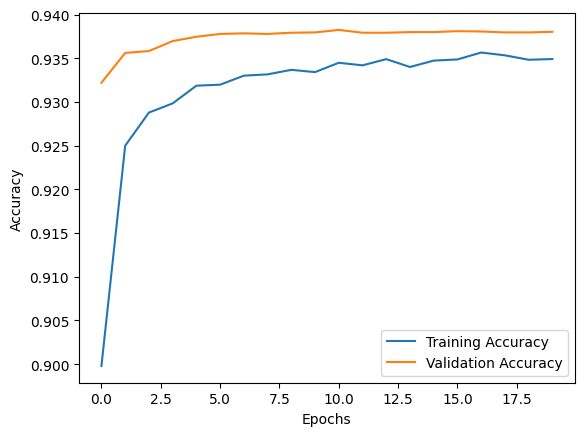

In [245]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adagrad
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with AdaGrad optimizer
model.compile(optimizer=Adagrad(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Accuracy: {accuracy}")

# Plot the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [246]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9023679158074379
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     23016
           1       0.72      0.75      0.74      5110

    accuracy                           0.90     28126
   macro avg       0.83      0.84      0.84     28126
weighted avg       0.90      0.90      0.90     28126



In [247]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print("Classification Report:")
print(report_rf)

Accuracy: 0.9372466756737539
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23016
           1       0.84      0.80      0.82      5110

    accuracy                           0.94     28126
   macro avg       0.90      0.88      0.89     28126
weighted avg       0.94      0.94      0.94     28126



In [248]:
from sklearn.naive_bayes import GaussianNB

# Initialize the GaussianNB model
nb_clf = GaussianNB()

# Train the model
nb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_clf.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f"Accuracy: {accuracy_nb}")
print("Classification Report:")
print(report_nb)

Accuracy: 0.898385835170305
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     23016
           1       0.68      0.83      0.75      5110

    accuracy                           0.90     28126
   macro avg       0.82      0.87      0.84     28126
weighted avg       0.91      0.90      0.90     28126



In [249]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Train the model
mlp_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_clf.predict(X_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
report_mlp = classification_report(y_test, y_pred_mlp)

print(f"Accuracy: {accuracy_mlp}")
print("Classification Report:")
print(report_mlp)

Accuracy: 0.9389177273696935
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     23016
           1       0.83      0.83      0.83      5110

    accuracy                           0.94     28126
   macro avg       0.90      0.90      0.90     28126
weighted avg       0.94      0.94      0.94     28126



In [250]:
# Create a dictionary with model names and their corresponding accuracies
model_accuracies = {
    "Model Name": ["Decision Tree", "K-Nearest Neighbors", "Logistic Regression", "MLP Classifier", "Naive Bayes", "Random Forest"],
    "Accuracy": [accuracy, accuracy_knn, accuracy_log_reg, accuracy_mlp, accuracy_nb, accuracy_rf]
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(model_accuracies)

# Add a serial number column
accuracy_df.insert(0, "Serial Number", range(1, 1 + len(accuracy_df)))

print(accuracy_df)

   Serial Number           Model Name  Accuracy
0              1        Decision Tree  0.902368
1              2  K-Nearest Neighbors  0.915132
2              3  Logistic Regression  0.937353
3              4       MLP Classifier  0.938918
4              5          Naive Bayes  0.898386
5              6        Random Forest  0.937247
